# Reference
https://pyimagesearch.com/2021/04/28/opencv-morphological-operations/

In [76]:
import cv2
import imutils
from matplotlib import pyplot as plt

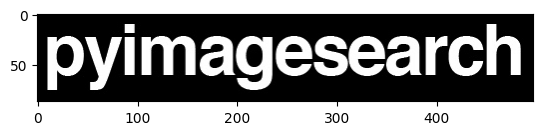

In [49]:
image = cv2.imread('../resources/morphological_sample1.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image)

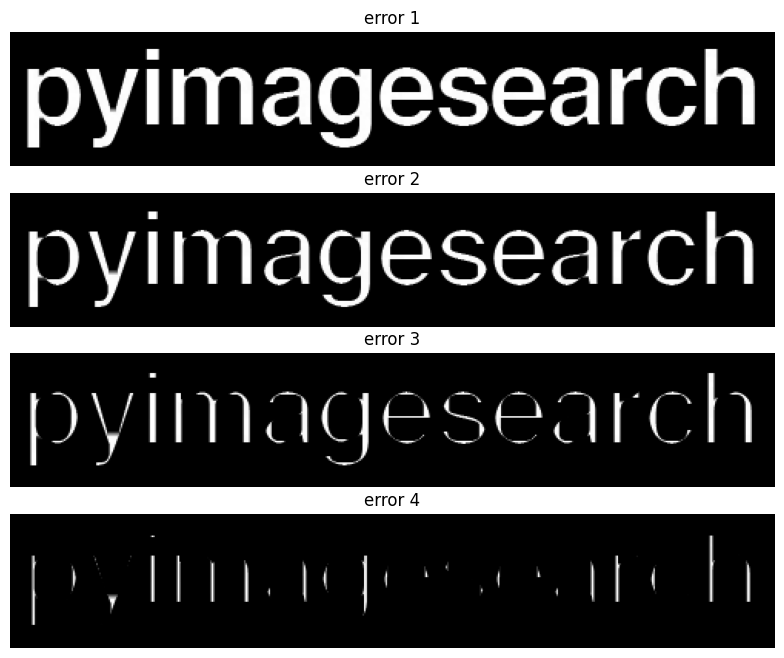

In [50]:
# erode
fig, axs = plt.subplots(4, 1, figsize=(12,8))
for i in range(0,4):
    erode = cv2.erode(gray, None, iterations=i+1)
    axs[i].axis('off')
    axs[i].set_title('error {}'.format(i+1))
    axs[i].imshow(erode, cmap=plt.cm.gray)
plt.show()

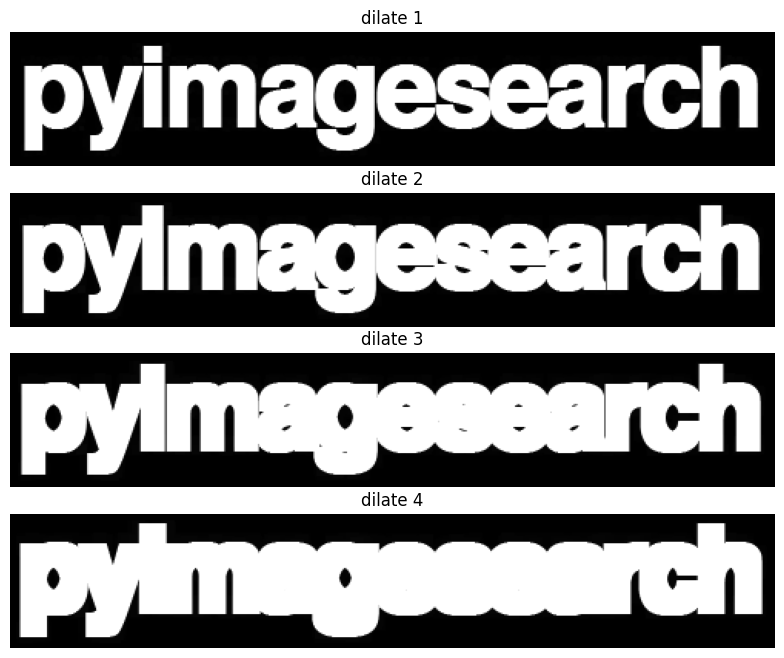

In [51]:
# dilate
fig, axs = plt.subplots(4, 1, figsize=(12,8))
for i in range(0,4):
    dilate = cv2.dilate(gray, None, iterations=i+1)
    axs[i].axis('off')
    axs[i].set_title('dilate {}'.format(i+1))
    axs[i].imshow(dilate, cmap=plt.cm.gray)
plt.show()

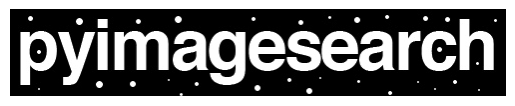

In [52]:
image2 = cv2.imread('../resources/morphological_sample2.jpg')
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

plt.axis('off')
plt.imshow(gray2, cmap=plt.cm.gray)

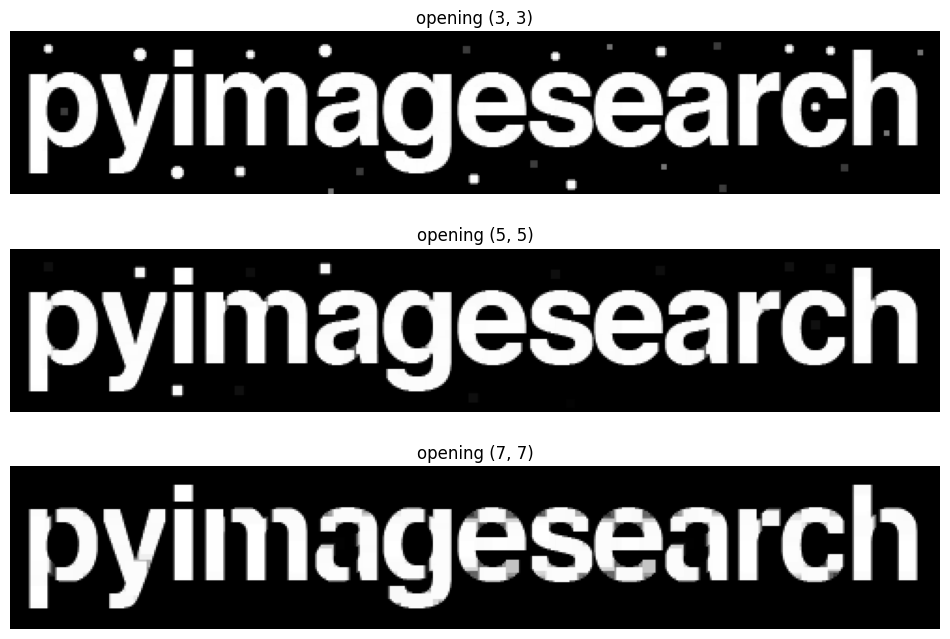

In [53]:
# opening (error then dilation), use to remove noise
kernel_sizes = [(3,3), (5,5), (7,7)]
fig, axs = plt.subplots(len(kernel_sizes), 1, figsize=(12,8))
for i,size in enumerate(kernel_sizes):
    # the sample image is rectangle shape
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, size)
    opening = cv2.morphologyEx(gray2, cv2.MORPH_OPEN, kernel)

    axs[i].axis('off')
    axs[i].set_title('opening {}'.format(size))
    axs[i].imshow(opening, cmap=plt.cm.gray)
plt.show()


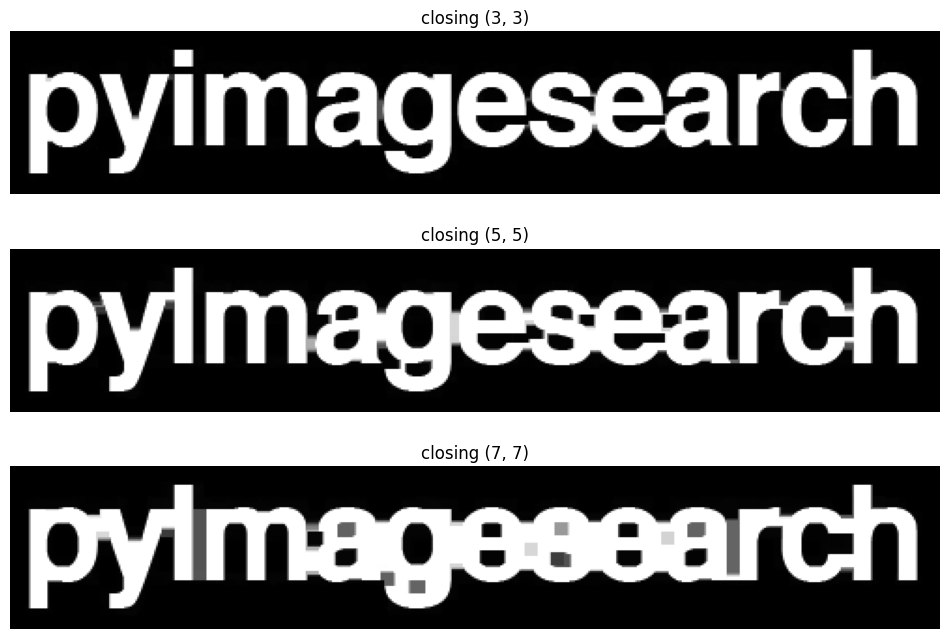

In [55]:
# closing (dilate then erode), use to connect the "gap" between pixels
kernel_sizes = [(3,3), (5,5), (7,7)]
fig, axs = plt.subplots(len(kernel_sizes), 1, figsize=(12,8))
for i,size in enumerate(kernel_sizes):
    # the sample image is rectangle shape
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, size)
    closing = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel)

    axs[i].axis('off')
    axs[i].set_title('closing {}'.format(size))
    axs[i].imshow(closing, cmap=plt.cm.gray)
plt.show()

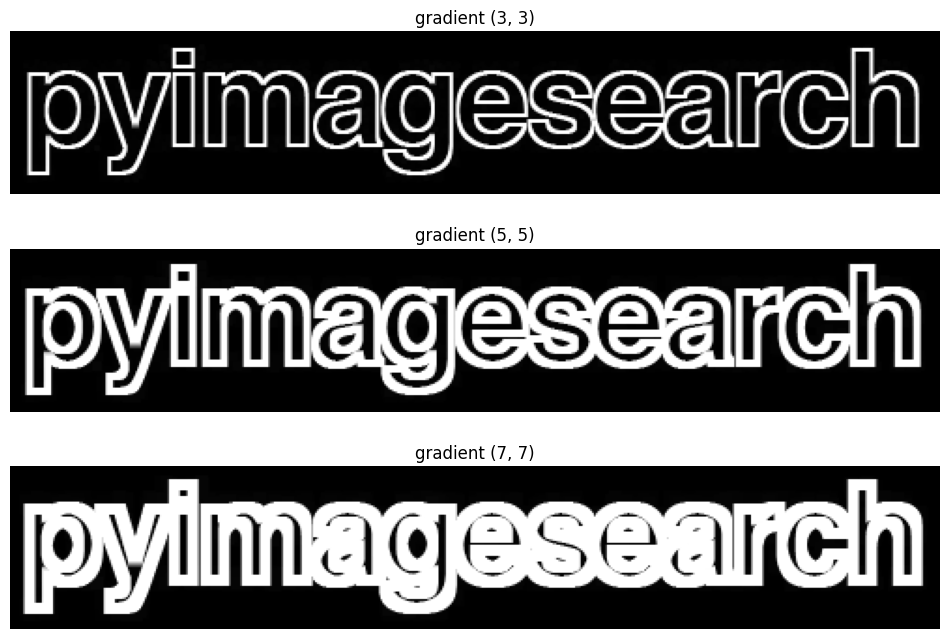

In [59]:
# gradient, use to get the outline
kernel_sizes = [(3,3), (5,5), (7,7)]
fig, axs = plt.subplots(len(kernel_sizes), 1, figsize=(12,8))
for i,size in enumerate(kernel_sizes):
    # the sample image is rectangle shape
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, size)
    gradient = cv2.morphologyEx(gray, cv2.MORPH_GRADIENT, kernel)

    axs[i].axis('off')
    axs[i].set_title('gradient {}'.format(size))
    axs[i].imshow(gradient, cmap=plt.cm.gray)
plt.show()

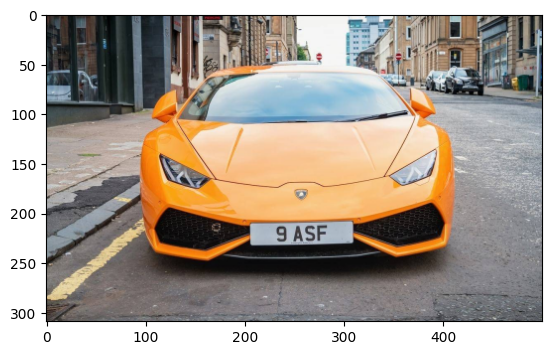

In [94]:
# top/white hat, black hat
image3 = cv2.imread('../resources/car.jpg')
image3 = imutils.resize(image3, width=500)
gray3 = cv2.cvtColor(image3, cv2.COLOR_BGR2GRAY)

plt.imshow(cv2.cvtColor(image3, cv2.COLOR_BGR2RGB))

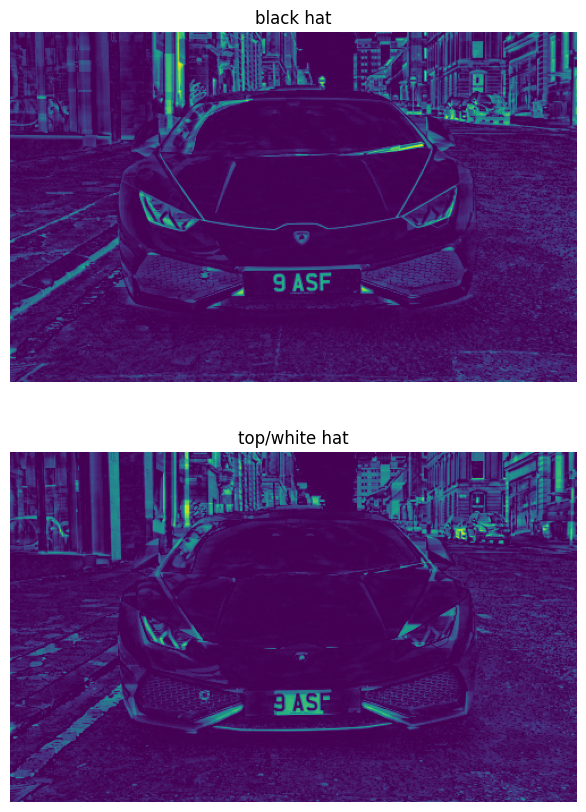

In [95]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13, 5))
black_hat = cv2.morphologyEx(gray3, cv2.MORPH_BLACKHAT, kernel)
white_hat = cv2.morphologyEx(gray3, cv2.MORPH_TOPHAT, kernel)

fig, axs = plt.subplots(2, 1, figsize=(12,10))

axs[0].axis(False)
axs[0].set_title('black hat')
axs[0].imshow(black_hat)

axs[1].axis(False)
axs[1].set_title('top/white hat')
axs[1].imshow(white_hat)

plt.show()